# Module 11 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

### Step 0: Dependencies and Setup

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html

url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
# Retrieve the HTML content of the page
html = browser.html

# Create a Beautiful Soup object
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table')

# Extract all rows of data
rows = table.find_all('tr')

# Print the rows of data
for row in rows:
    print(row)

<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>


In [6]:
# Print the rows using the prettify() method
for row in rows:
    print(row.prettify())

<tr>
 <th>
  id
 </th>
 <th>
  terrestrial_date
 </th>
 <th>
  sol
 </th>
 <th>
  ls
 </th>
 <th>
  month
 </th>
 <th>
  min_temp
 </th>
 <th>
  pressure
 </th>
</tr>

<tr class="data-row">
 <td>
  2
 </td>
 <td>
  2012-08-16
 </td>
 <td>
  10
 </td>
 <td>
  155
 </td>
 <td>
  6
 </td>
 <td>
  -75.0
 </td>
 <td>
  739.0
 </td>
</tr>

<tr class="data-row">
 <td>
  13
 </td>
 <td>
  2012-08-17
 </td>
 <td>
  11
 </td>
 <td>
  156
 </td>
 <td>
  6
 </td>
 <td>
  -76.0
 </td>
 <td>
  740.0
 </td>
</tr>

<tr class="data-row">
 <td>
  24
 </td>
 <td>
  2012-08-18
 </td>
 <td>
  12
 </td>
 <td>
  156
 </td>
 <td>
  6
 </td>
 <td>
  -76.0
 </td>
 <td>
  741.0
 </td>
</tr>

<tr class="data-row">
 <td>
  35
 </td>
 <td>
  2012-08-19
 </td>
 <td>
  13
 </td>
 <td>
  157
 </td>
 <td>
  6
 </td>
 <td>
  -74.0
 </td>
 <td>
  732.0
 </td>
</tr>

<tr class="data-row">
 <td>
  46
 </td>
 <td>
  2012-08-20
 </td>
 <td>
  14
 </td>
 <td>
  157
 </td>
 <td>
  6
 </td>
 <td>
  -74.0
 </td>
 <td>
  740.0
 <

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in rows[1:]: # Skipping the header row
    # Find all columns in each row
    cols = row.find_all('td')

    # Extract the text from each column and strip the whitespace
    row_data = [col.text.strip() for col in cols]

    # Append the list of row data to the list of rows
    data.append(row_data)

# Print the data to check that the data was scraped correctly
for row in data:
    print(row)


['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05', '

In [10]:
# Stripping the header row of the table
header_row = rows[0]
column_names = [col.text.strip() for col in header_row.find_all('th')]

column_names

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [11]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data, columns=column_names)

df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [12]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [14]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Convert 'sol', 'ls' and 'month' columns to integers
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)

# Convert 'pressure' and 'min_temp' columns to floats
df['pressure'] = df['pressure'].astype(float)
df['min_temp'] = df['min_temp'].astype(float)

df.dtypes


id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [15]:
# 1. How many months are there on Mars?
# Determine the number of unique months on Mars
unique_months = df['month'].nunique()

# Print the number of unique months
print(f"There are {unique_months} unique months on Mars.")

There are 12 unique months on Mars.


In [17]:
# Determine the number of unique Martian days (sols) in the dataset
unique_id = df['id'].nunique()

# Print the number of unique Martian days
print(f"There are {unique_id} Martian days' worth of data in the dataset.")

There are 1867 Martian days' worth of data in the dataset.


In [18]:
# 3. What is the average low temperature by month?
# The average minimum daily temperature for each month
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Print the results
print(avg_min_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


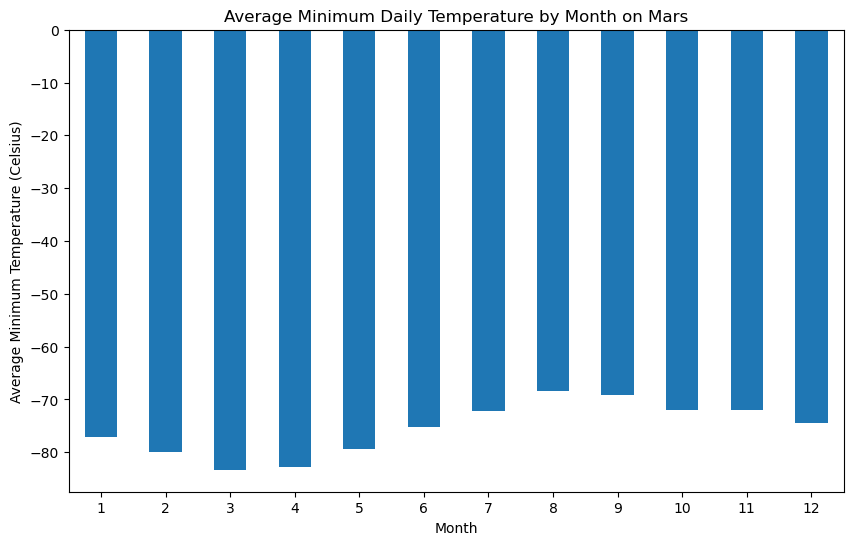

In [28]:
# Plot the average minimum daily temperature for each month
plt.figure(figsize=(10, 6))
avg_min_temp_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (Celsius)')
plt.title('Average Minimum Daily Temperature by Month on Mars')
plt.xticks(rotation=0)

# Save the plot as a .png file
plt.savefig('outputs/average_min_temp_by_month.png', bbox_inches='tight')

plt.show()

In [20]:
# Save the DataFrame to a CSV file in the outputs folder
df.to_csv('Outputs/mars_weather_data.csv', index=False)

<function matplotlib.pyplot.show(close=None, block=None)>

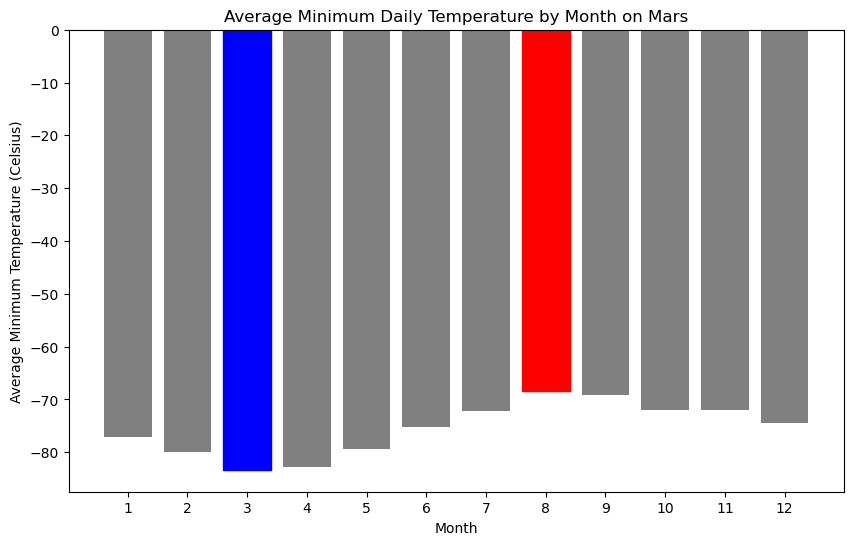

In [22]:
# Sort the values
sorted_avg_min_temp_by_month = avg_min_temp_by_month.sort_values()

# Plot the average minimum daily temperature for each month
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_avg_min_temp_by_month.index, sorted_avg_min_temp_by_month.values, color='grey')

# Color the lowest temperature bar blue and the highest temperature bar red
bars[0].set_color('blue')
bars[-1].set_color('red')

plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (Celsius)')
plt.title('Average Minimum Daily Temperature by Month on Mars')
plt.xticks(ticks=sorted_avg_min_temp_by_month.index, labels=sorted_avg_min_temp_by_month.index)

plt.show

In [23]:
# Find the month with the lowest average minimum temperature
coldest_month = avg_min_temp_by_month.idxmin()
coldest_temp = avg_min_temp_by_month.min()

# Find the month with the highest average minimum temperature
warmest_month = avg_min_temp_by_month.idxmax()
warmest_temp = avg_min_temp_by_month.max()

# Print the results
print(f"The coldest month on Mars at Curiosity's location is Month {coldest_month} with an average minimum temperature of {coldest_temp:.2f}°C.")
print(f"The warmest month on Mars at Curiosity's location is Month {warmest_month} with an average minimum temperature of {warmest_temp:.2f}°C.")

The coldest month on Mars at Curiosity's location is Month 3 with an average minimum temperature of -83.31°C.
The warmest month on Mars at Curiosity's location is Month 8 with an average minimum temperature of -68.38°C.


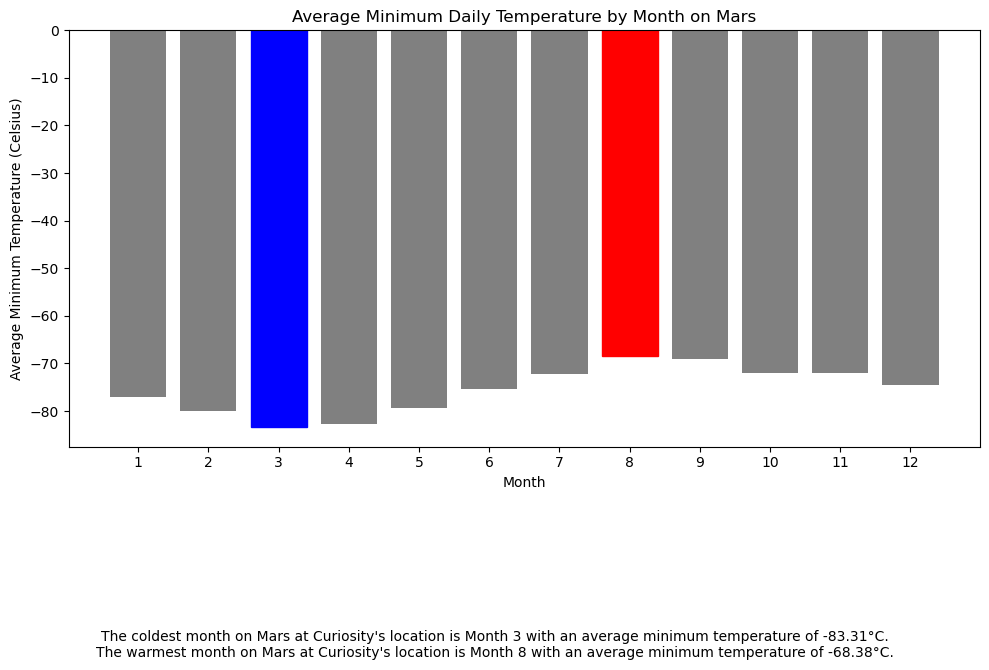

In [32]:
# Calculate the average minimum daily temperature for each month
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Sort the values
sorted_avg_min_temp_by_month = avg_min_temp_by_month.sort_values()

# Plot the average minimum daily temperature for each month
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_avg_min_temp_by_month.index, sorted_avg_min_temp_by_month.values, color='grey')

# Color the lowest temperature bar blue and the highest temperature bar red
bars[0].set_color('blue')
bars[-1].set_color('red')

plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (Celsius)')
plt.title('Average Minimum Daily Temperature by Month on Mars')
plt.xticks(ticks=sorted_avg_min_temp_by_month.index, labels=sorted_avg_min_temp_by_month.index)  # Ensure all months are shown

# Add text for the coldest and warmest months
coldest_month = sorted_avg_min_temp_by_month.idxmin()
coldest_temp = sorted_avg_min_temp_by_month.min()
warmest_month = sorted_avg_min_temp_by_month.idxmax()
warmest_temp = sorted_avg_min_temp_by_month.max()

text = (
    f"The coldest month on Mars at Curiosity's location is Month {coldest_month} with an average minimum temperature of {coldest_temp:.2f}°C.\n"
    f"The warmest month on Mars at Curiosity's location is Month {warmest_month} with an average minimum temperature of {warmest_temp:.2f}°C."
)
plt.gcf().text(0.5, -0.15, text, ha='center', fontsize=10, wrap=True)

# Adjust the layout to make room for the text
plt.tight_layout(rect=[0, 0.1, 1, 0.95])

# Save the plot with the text to the outputs folder as a .png file
plt.savefig('outputs/average_min_temp_by_month_with_text.png', bbox_inches='tight')

# Display the plot
plt.show()


In [29]:
# 4. What is the average pressure by Martian month?
# The average pressure for each month
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

# Print the results
print(avg_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


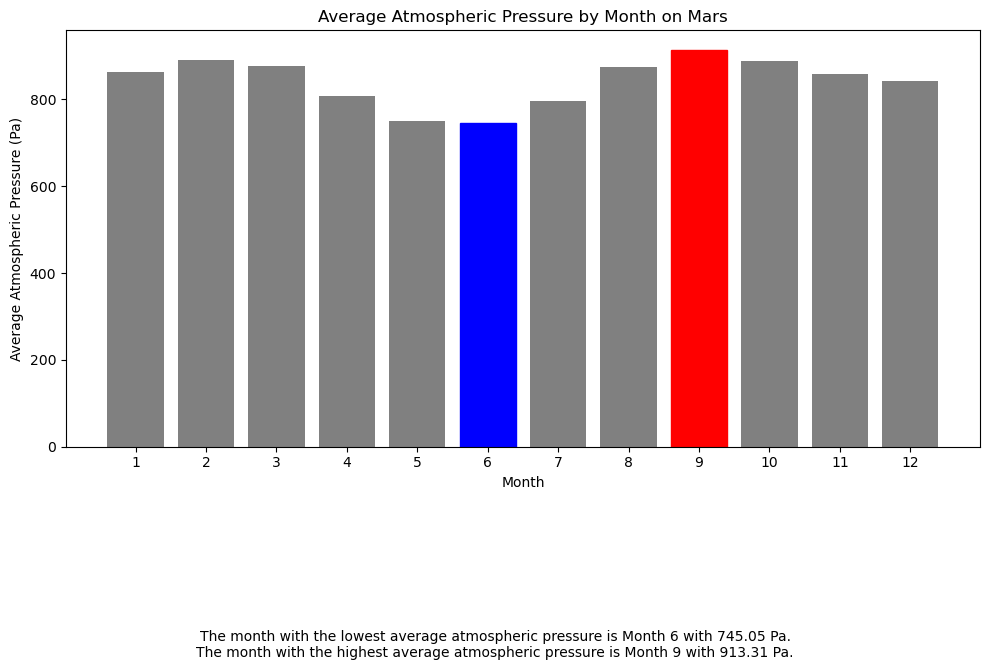

In [31]:
# Calculate the average atmospheric pressure for each month
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

# Sort the values
sorted_avg_pressure_by_month = avg_pressure_by_month.sort_values()

# Plot the average atmospheric pressure for each month
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_avg_pressure_by_month.index, sorted_avg_pressure_by_month.values, color='grey')

# Color the lowest pressure bar blue and the highest pressure bar red
bars[0].set_color('blue')
bars[-1].set_color('red')

plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure (Pa)')
plt.title('Average Atmospheric Pressure by Month on Mars')
plt.xticks(ticks=sorted_avg_pressure_by_month.index, labels=sorted_avg_pressure_by_month.index)  # Ensure all months are shown

# Add text for the lowest and highest pressure months
lowest_pressure_month = sorted_avg_pressure_by_month.idxmin()
lowest_pressure_value = sorted_avg_pressure_by_month.min()
highest_pressure_month = sorted_avg_pressure_by_month.idxmax()
highest_pressure_value = sorted_avg_pressure_by_month.max()

text = (
    f"The month with the lowest average atmospheric pressure is Month {lowest_pressure_month} with {lowest_pressure_value:.2f} Pa.\n"
    f"The month with the highest average atmospheric pressure is Month {highest_pressure_month} with {highest_pressure_value:.2f} Pa."
)
plt.gcf().text(0.5, -0.15, text, ha='center', fontsize=10, wrap=True)

# Adjust the layout to make room for the text
plt.tight_layout(rect=[0, 0.1, 1, 0.95])

# Save the plot with the text to the outputs folder as a .png file
plt.savefig('outputs/average_pressure_by_month_with_text.png', bbox_inches='tight')

# Display the plot
plt.show()


Solar Longitude (Ls): It is the angle measured from the Sun, with respect to the vernal equinox of Mars (Mars' "spring" point). It ranges from 0° to 360° over the course of a Martian year. 

For example:
- `Ls = 0°`: Mars is at the vernal equinox (start of northern spring).
- `Ls = 90°`: Mars is at the summer solstice (start of northern summer).
- `Ls = 180°`: Mars is at the autumnal equinox (start of northern autumn).
- `Ls = 270°`: Mars is at the winter solstice (start of northern winter).

To determine how many terrestrial (Earth) days there are in a Martian year using Ls, we track the cycle from 0° back to 0°.

Please note that using minimum temperature will also yield a ballpark answer.

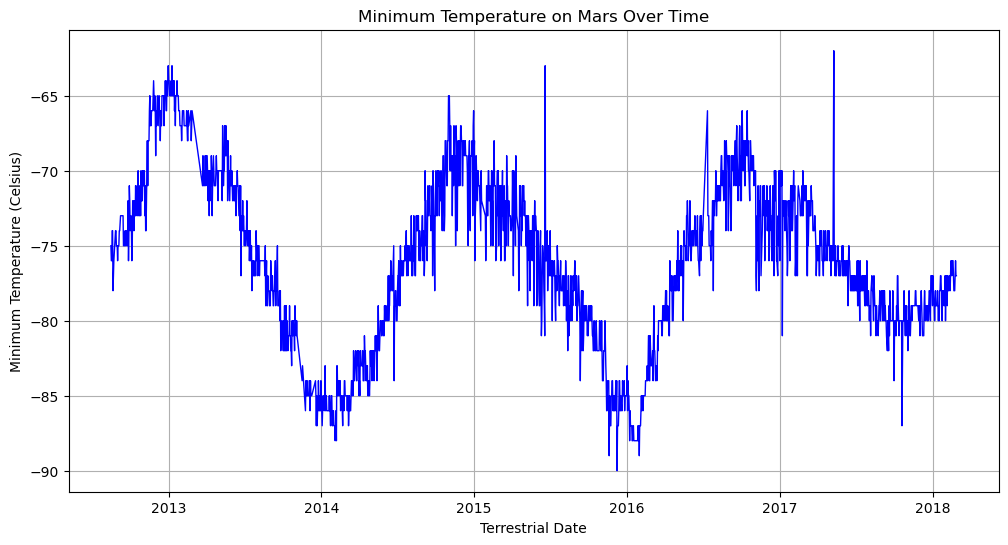

In [33]:
# Plot the minimum temperature as a time series
plt.figure(figsize=(12, 6))
plt.plot(df['terrestrial_date'], df['min_temp'], color='blue', linewidth=1)

plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (Celsius)')
plt.title('Minimum Temperature on Mars Over Time')
plt.grid(True)

# Save the plot to the outputs folder as a .png file
plt.savefig('outputs/min_temp_time_series.png', bbox_inches='tight')

# Display the plot
plt.show()

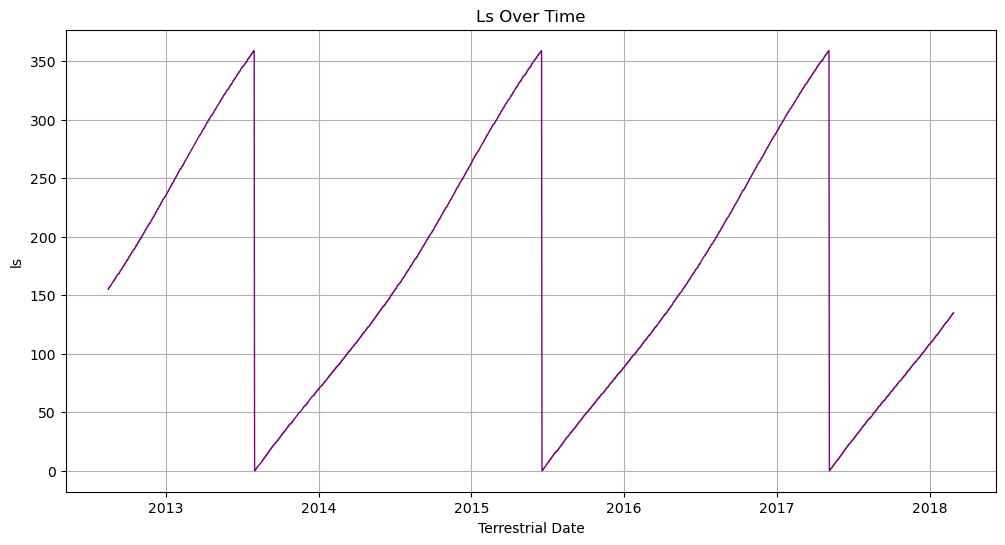

In [35]:
# Plot the solar longitude (ls) as a time series
plt.figure(figsize=(12, 6))
plt.plot(df['terrestrial_date'], df['ls'], color='purple', linewidth=1)

plt.xlabel('Terrestrial Date')
plt.ylabel('ls')
plt.title('Ls Over Time')
plt.grid(True)

# # Save the plot to the outputs folder as a .png file
# plt.savefig('outputs/min_temp_time_series.png', bbox_inches='tight')

# Display the plot
plt.show()

In [41]:
# Ensure the 'terrestrial_date' column is in datetime format
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Sort the DataFrame by 'sol' to ensure chronological order in Martian days
df = df.sort_values(by='sol')

# Identify all entries where 'ls' is 0 (beginning of the Martian year)
ls_zero_df = df[df['ls'] == 0][['terrestrial_date', 'ls']]

# Print the DataFrame
print(ls_zero_df)

# Save the DataFrame to a CSV file in the outputs folder
ls_zero_df.to_csv('outputs/ls_zero_dates.csv', index=False)

     terrestrial_date  ls
304        2013-08-01   0
305        2013-08-02   0
925        2015-06-19   0
926        2015-06-20   0
1579       2017-05-06   0
1580       2017-05-07   0


In [42]:
# Ensure the 'terrestrial_date' column is in datetime format
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Sort the DataFrame by 'sol' to ensure chronological order in Martian days
df = df.sort_values(by='sol')

# Identify all entries where 'ls' is 0 (beginning of the Martian year)
ls_zero_df = df[df['ls'] == 0][['terrestrial_date', 'ls']]

# Calculate the difference in days between each date entry and the one above
ls_zero_df['days_diff'] = ls_zero_df['terrestrial_date'].diff().dt.days

# Print the DataFrame
print(ls_zero_df)

# Save the DataFrame to a CSV file in the outputs folder
ls_zero_df.to_csv('outputs/ls_zero_dates_with_diff.csv', index=False)

     terrestrial_date  ls  days_diff
304        2013-08-01   0        NaN
305        2013-08-02   0        1.0
925        2015-06-19   0      686.0
926        2015-06-20   0        1.0
1579       2017-05-06   0      686.0
1580       2017-05-07   0        1.0


In [47]:
earth_days_per_martian_year = int(ls_zero_df['days_diff'].max())
earth_days_per_martian_year

print(f"There are {earth_days_per_martian_year} terrestrial (Earth) days in a Martian year.")

There are 686 terrestrial (Earth) days in a Martian year.


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [48]:
# Write the data to a CSV
# Done with each bit of code above; please refer to the Outputs folder for the CSV and PNG files.

In [49]:
browser.quit()